In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpltools import annotation
import scipy.linalg as sl

# Question 2 - [35 marks] <a class="tocSkip"></a>

Consider the function

$$
  f(x, y) = (x^2+y)^2 + (x+y^2)^2
$$

**2.1** Find the point(s) $(x,y)$  for which $f$ attains its global minimal value. (hint: notice that $f(x,y)\geq 0$ for all $x, y$). Is this function convex?

$f(x,y) = x^4+y^2+2x^2y+x^2+y^4+2xy^2$,  if $f(x,y) = 0$, $(x,y) = (0, 0)$.

Then, $\frac {\delta f(x,y)}{\delta x} = 4x^3+4xy+2x+2y^2 = 0$, $\frac {\delta f(x,y)}{\delta y} = 2y+2x^2+4y^3+4xy = 0$

And, $\frac {\delta^2 f(x,y)}{\delta x^2} = 12x^2+4y+2$ > 0 , $\frac {\delta^2 f(x,y)}{\delta y^2} = 12y^2+4x+2 > 0.$

It looks like this is the minimum solution and that this will be a convex function.
But the fact is that there are other solutions we can get.

For the $\frac {\delta f(x,y)}{\delta x} = 4x^3+4xy+2x+2y^2 = 0$, $\frac {\delta f(x,y)}{\delta y} = 2y+2x^2+4y^3+4xy = 0$, we also have the solution:
x = -1, y = -1 AND x = -1/2, y = -1/2.

For x = -1, y = -1, $\frac {\delta^2 f(x,y)}{\delta x^2} > 0$, $\frac {\delta^2 f(x,y)}{\delta y^2} > 0$.

Also, for x = -1/2, y = -1/2, $\frac {\delta^2 f(x,y)}{\delta x^2} > 0$, $\frac {\delta^2 f(x,y)}{\delta y^2} > 0$.

This shows that there are multiple local optimal solutions for our function. In order to compare who is the global minimum, the easiest way to do this is to put the values of the parameters we got for the stationary point back into the original function and calculate them.

$$
  f(0,0) = 0, \\
  f(-1, -1) = 0, \\
  f(-\frac {1}{2}, -\frac {1}{2}) = \frac{1}{8}, \\
$$

So, the point $(x,y) = (0, 0)$ AND $(x,y) = (-1, -1)$, are the global minimum points.

We can see if the function is convex by plotting the contour plot of this original function.

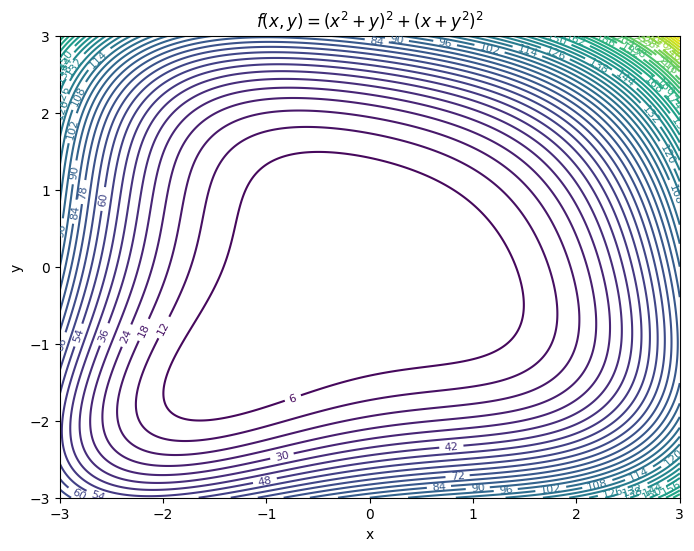

In [2]:
# Define the grid for x, y
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)

# Define function
F = (X**2 + Y)**2 + (X + Y**2)**2

# Plotting contour plots of functions
plt.figure(figsize=(8, 6))
contours = plt.contour(X, Y, F, 50)
plt.clabel(contours, inline=True, fontsize=8)
plt.title('$f(x, y) = (x^2+y)^2 + (x+y^2)^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

This image shows the function $f(x, y) = (x^2+y)^2 + (x+y^2)^2$ is **not convex.**

We can also prove this by computing the eigenvalues of the Hessian matrix.
Since, $\frac {\delta^2 f(x,y)}{\delta x \delta y} = 4x+4y$

$ \lambda_1 = 6x^2 + 2x + 6y^2 + 2y - 2\sqrt{9x^4 - 6x^3 - 18x^2y^2 + 6x^2y + 5x^2 + 6xy^2 + 6xy + 9y^4 - 6y^3 + 5y^2} + 2 $

$ \lambda_2 = 6x^2 + 2x + 6y^2 + 2y + 2\sqrt{9x^4 - 6x^3 - 18x^2y^2 + 6x^2y + 5x^2 + 6xy^2 + 6xy + 9y^4 - 6y^3 + 5y^2} + 2 $

In [3]:
x,y = -1.3, 0
lambda_1 = 6*x**2 + 2*x + 6*y**2 + 2*y - 2*np.sqrt(9*x**4 - 6*x**3 - 18*x**2*y**2 + 6*x**2*y + 5*x**2 + 6*x*y**2 + 6*x*y + 9*y**4 - 6*y**3 + 5*y**2) + 2
lambda_2 = 6*x**2 + 2*x + 6*y**2 + 2*y + 2*np.sqrt(9*x**4 - 6*x**3 - 18*x**2*y**2 + 6*x**2*y + 5*x**2 + 6*x*y**2 + 6*x*y + 9*y**4 - 6*y**3 + 5*y**2) + 2
print(lambda_1, lambda_2)

-4.220363367295212 23.300363367295212


**We can find cases where the eigenvalues are negative, which indicates that our function is not a convex function.** 

(**not** positive semi-definite means that $f$ is **not** convex)

**2.2** Implement the function $f$ and its first and second derivatives as python functions. All three functions should take a length 2 
list or array with the x and y value as their single argument. They should return respectively a single value, a length 2 array, and a 2x2 array.
Test the derivative functions!

In [4]:
# Define function 'f'
def f(xy):
    x, y = xy
    return (x**2 + y)**2 + (x + y**2)**2

# Define first derivatives
def f_prime(xy):
    x, y = xy
    df_dx = 4*x*(x**2 + y) + 2*(x + y**2)
    df_dy = 2*(x**2 + y) + 4*y*(x + y**2)
    return np.array([df_dx, df_dy])

# Define second derivatives(Hessian)
def f_double_prime(xy):
    x, y = xy
    d2f_dx2 = 12*x**2 + 2 - 4*y
    d2f_dy2 = 12*y**2 + 2 - 4*x
    d2f_dxdy = d2f_dydx = 4*(x + y)
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dydx, d2f_dy2]])


First, verify that our implementation is correct by choosing a parameter that we know has a first-order derivative of 0 for the point. (x = -1, y = -1)

In [5]:
# Testing first and second order derivative functions
test_point1 = [-1, -1]

# Calculating first order derivatives
gradient1 = f_prime(test_point1)

# Calculating second order derivatives (Hessian)
hessian1 = f_double_prime(test_point1)

gradient1, hessian1

(array([0, 0]),
 array([[18, -8],
        [-8, 18]]))

Then choose another point.

In [6]:
# Testing first and second order derivative functions
test_point2 = [0.5, 0.5]

# Calculating first order derivatives
gradient2 = f_prime(test_point2)

# Calculating second order derivatives (Hessian)
hessian2 = f_double_prime(test_point2)

gradient2, hessian2

(array([3., 3.]),
 array([[3., 4.],
        [4., 3.]]))

In more detail, we need to use Taylor test to check that our first order derivatives are correctly implemented.

In [7]:
# font sizes for plots
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

def taylor_test(f, grad_f, x, h0, max_iter=8, plot_convergence=True, print_convergence=True):
    """Taylor test to verify that the function grad_f is the derivative of the function `f`
    
    We test:
    
       f(x + h) = f(x) + grad_f(x).h + O(h^2)
    
    f, grad_f  - function and its derivative to test
    x          - point in which to test
    h0         - initial perturbation
    max_iter   - number of times that h is halved
    plot_convergence - whether to plot the convergence of the Taylor residual f(x+h)-f(x)-grad_f(x).h
    print_convergence - prints the order of convergence between subsequent iterations."""


    h = h0.copy()
    residuals = []
    hnorms = []
    fx = f(x)
    dfdx = grad_f(x)
    
    for i in range(max_iter):
        if len(h.shape)>1:
            # tensordot sums over all indices of h and corresponding last indices of dfdx
            r = f(x + h) - fx - np.tensordot(dfdx, h, axes=len(h.shape))
        else:
            r = f(x + h) - fx - dfdx @ h
            
        residuals.append(sl.norm(r))
        hnorms.append(sl.norm(h))
        h /= 2.

    if plot_convergence:
        fig, ax = plt.subplots(1,2, figsize=(16,4))
        ax[0].semilogy(residuals)
        ax[0].set_xlabel('iteration')
        ax[0].set_ylabel('Taylor residual $|r|$')
        ax[0].set_xticks(range(0,max_iter,2))
        ax[1].loglog(hnorms, residuals)
        ax[1].set_xlabel('perturbation size $\|h\|$')
        ax[1].set_ylabel('Taylor residual $|r|$')

    if print_convergence:
        residuals = np.array(residuals)
        print('Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):')
        print(np.log(residuals[:-1]/residuals[1:])/np.log(2))

Testing the first derivative:

Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):
[2.25415297 2.13118147 2.06645928 2.03341886 2.01675262 2.00838655
 2.00419577]


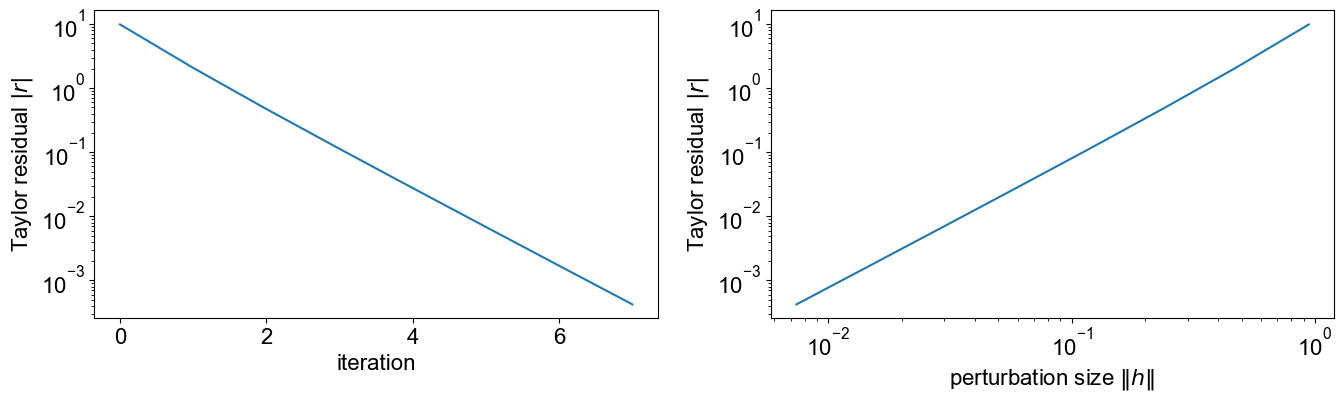

In [8]:
np.random.seed(42) # fixing the random seed to get consistent results
xy = np.random.random(2)
h0 = np.random.random(2)
taylor_test(f, f_prime, xy, h0)

The residual converges at second order which indicates a correct implementation.

To test the second derivative, we can either test whether `f_double_prime` is the (first) derivative of `f_prime`:

Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):
[2.04791164 1.65049116 1.34601669 1.16748936 1.07926235 1.03795616
 1.0184793 ]


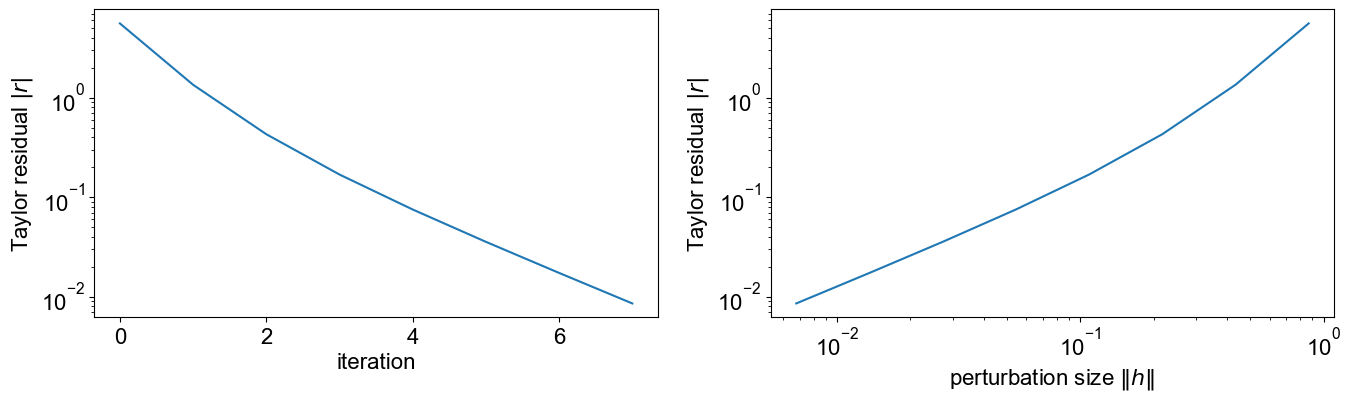

In [9]:
# choose a random point
xy = np.random.random(2)
h0 = np.random.random(2)
taylor_test(f_prime, f_double_prime, xy, h0)

This again gives second-order convergence, proving that our implementation is correct.

We can test whether the Taylor residual that includes both the first and second derivatives terms (instead of just the first) converges at *third* order:

$$
r({\bf h}) = f({\bf x} + {\bf h}) - f({\bf x}) - f'({\bf x})\cdot{\bf h}
 - \tfrac 12 {\bf h}^T f''({\bf x}){\bf h} = \mathcal{O(\|h\|^3)}\;\;
  \text{ for }\|{\bf h}\|\to 0
$$

This is implemented in the following function:

In [10]:
def taylor_test(f, grad_f, x, h0, hess=None, max_iter=8, plot_convergence=True, print_convergence=True):
    """Taylor test to verify that the function grad_f is the derivative of the function `f`
    
    We test:
    
       f(x + h) = f(x) + grad_f(x).h + 1/2 h^T.hess.h + O(h^3) 
    
    f, grad_f, hess  - function and its first and second derivatives
    x          - point in which to test
    h0         - initial perturbation
    max_iter   - number of times that h is halved
    plot_convergence - whether to plot the convergence of the Taylor residual f(x+h)-f(x)-grad_f(x).h
    print_convergence - prints the order of convergence between subsequent iterations."""


    h = h0.copy()
    residuals = []
    hnorms = []
    fx = f(x)
    dfdx = grad_f(x)
    if hess is not None:
        H = f_double_prime(x)
    
    for i in range(max_iter):
        if len(h.shape)>1:
            # tensordot sums over all indices of h and corresponding last indices of dfdx
            r = f(x + h) - fx - np.tensordot(dfdx, h, axes=len(h.shape))
        else:
            r = f(x + h) - fx - dfdx @ h
        if hess is not None:
            r -= 0.5 * h @ H @ h
            
        residuals.append(sl.norm(r))
        hnorms.append(sl.norm(h))
        h /= 2.

    if plot_convergence:
        fig, ax = plt.subplots(1,2, figsize=(16,4))
        ax[0].semilogy(residuals)
        ax[0].set_xlabel('iteration')
        ax[0].set_ylabel('Taylor residual $|r|$')
        ax[0].set_xticks(range(0,max_iter,2))
        ax[1].loglog(hnorms, residuals)
        ax[1].set_xlabel('perturbation size $\|h\|$')
        ax[1].set_ylabel('Taylor residual $|r|$')

    if print_convergence:
        residuals = np.array(residuals)
        print('Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):')
        print(np.log(residuals[:-1]/residuals[1:])/np.log(2))

Order of convergence, log(r(h_i)/r(h_{i+1}))/log(2):
[2.60446137 2.3519888  2.19134781 2.09994868 2.05110165 2.02584017
 2.01299337]


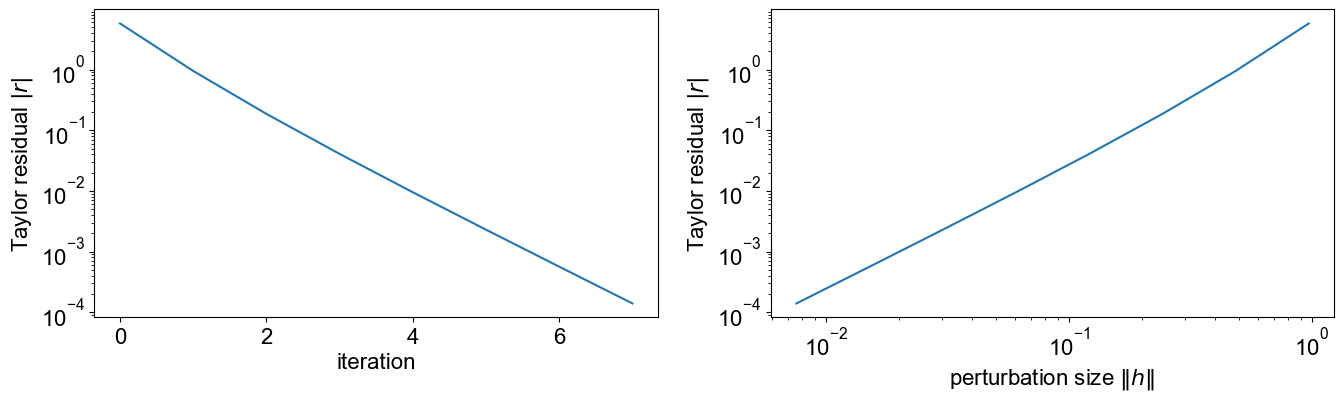

In [11]:
# choose a random point
xy = np.random.random(2)
h0 = np.random.random(2)
taylor_test(f, f_prime, xy, h0, hess=f_double_prime)

Which indeed shows third order converges for the extended Taylor residual, which indicates a correct implementation of the Hessian.

**2.3** Implement the following three methods for finding the minimum/minima of this function:
- Steepest descent with a backtracking line search algorithm
- Newton's method using a direct solve combined with a backtracking line search algorithm
- Truncated Newton's method using (truncated) Conjugate Gradient combined with a backtracking line search algorithm

For all three methods implement a stopping criterion based on (only!) the following condition:

$$
  \left\| \frac{\partial f}{\partial{\bf x}} \right\|_2 = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2
  + \left(\frac{\partial f}{\partial y}\right)^2}
  \leq 10^{-8}
$$

Investigate the convergence of all three methods in terms of number of iterations required, and whether the converged result is correct, by systematically looping through a substantial (say a few hundred) number of initial guesses $(x_0, y_0)$ in the region $-4\leq x_0 \leq 4, -4\leq y_0 \leq 4$. For each of the three methods plot two or three trajectories (i.e. the individual $(x_i, y_i)$ iteration points) that are representative of the different behaviour from different starting points. Explain your observations using your knowledge about these methods.

You may use the same line search algorithm for all three cases. You may use any code from the lecture notes, tutorials, or previous year's feedback, but make sure you understand all lines of code and make adjustments where needed. Do not use implementation of solver or optimisation algorithms in scipy, or any other external package here.

**Line search algorithm.**

In [12]:
def backtracking_line_search(f, grad_f, xk, pk, alpha=0.3, beta=0.8):
    """
    Backtracking line search to find the step size that satisfies the Armijo condition.
    """
    t = 1
    while f(xk + t * pk) > f(xk) + alpha * t * np.dot(grad_f(xk).T, pk):
        t *= beta
    return t

**Steepest descent with a backtracking line search algorithm.**

In [13]:
def steepest_descent(f, grad_f, x0, tol=1e-8, max_iters=1000):
    xk = np.array(x0)
    trajectory = [xk.copy()]
    for _ in range(max_iters):
        grad = grad_f(xk)
        if np.linalg.norm(grad) <= tol:
            break
        pk = -grad
        t = backtracking_line_search(f, grad_f, xk, pk)
        xk += t * pk
        trajectory.append(xk.copy())
    return xk, trajectory

**Newton's method using a direct solve combined with a backtracking line search algorithm.**

In [14]:
def newtons_method(f, grad_f, hess_f, x0, tol=1e-8, max_iters=1000):
    xk = np.array(x0)
    trajectory = [xk.copy()]
    for _ in range(max_iters):
        grad = grad_f(xk)
        if np.linalg.norm(grad) <= tol:
            break
        H = hess_f(xk)
        pk = np.linalg.solve(H, -grad)
        t = backtracking_line_search(f, grad_f, xk, pk)
        xk += t * pk
        trajectory.append(xk.copy())
    return xk, trajectory

**Truncated Newton's method using (truncated) Conjugate Gradient combined with a backtracking line search algorithm.**

In [15]:
def truncated_newtons_method(f, grad_f, hess_f, x0, tol=1e-8, max_iters=1000, cg_tol=0.5):
    def cg(A, b, tol=cg_tol):
        """
        Conjugate Gradient method to approximately solve Ax = b.
        """
        x = np.zeros_like(b)
        r = b - A @ x
        p = r.copy()
        for _ in range(len(b)):
            Ap = A @ p
            alpha = r.dot(r) / p.dot(Ap)
            x += alpha * p
            r_new = r - alpha * Ap
            if np.linalg.norm(r_new) < tol:
                break
            beta = r_new.dot(r_new) / r.dot(r)
            p = r_new + beta * p
            r = r_new
        return x

    xk = np.array(x0)
    trajectory = [xk.copy()]
    for _ in range(max_iters):
        grad = grad_f(xk)
        if np.linalg.norm(grad) <= tol:
            break
        H = hess_f(xk)
        pk = cg(H, -grad)
        t = backtracking_line_search(f, grad_f, xk, pk)
        xk += t * pk
        trajectory.append(xk.copy())
    return xk, trajectory

Let's start with a simple test of our implemented functions.

In [16]:
# Example usage with a single starting point
x0 = [0.5, -0.5]
result_sd, traj_sd = steepest_descent(f, f_prime, x0)
result_nm, traj_nm = newtons_method(f, f_prime, f_double_prime, x0)
result_tnm, traj_tnm = truncated_newtons_method(f, f_prime, f_double_prime, x0)

result_sd, result_nm, result_tnm

(array([-1.18344237e-09, -1.41867600e-09]),
 array([ 4.13164456e-10, -2.72029946e-10]),
 array([1.16164956e-09, 1.03692601e-09]))

The results we obtained using all three methods are close to (0,0), which is one of the globally minimum solutions known to us, which is a preliminary indication that our implementation is correct, and we will verify this in more detail next.

We need to define a contour plotting function to better observe how our implementation performs.

In [17]:
# To make the contour map sparse, we can reduce the number of contour lines
def plot_contours_sparse(ax):
    x = np.linspace(-4, 4, 400)
    y = np.linspace(-4, 4, 400)
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='jet')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])

The convergence of the three methods in terms of the number of iterations required is investigated by systematically looping a large number (several hundred) of initial guesses $(x_0, y_0)$ over the $-4\leq x_0 \leq 4, -4\leq y_0 \leq 4$ region and plotting the image to see if the converged result is correct.

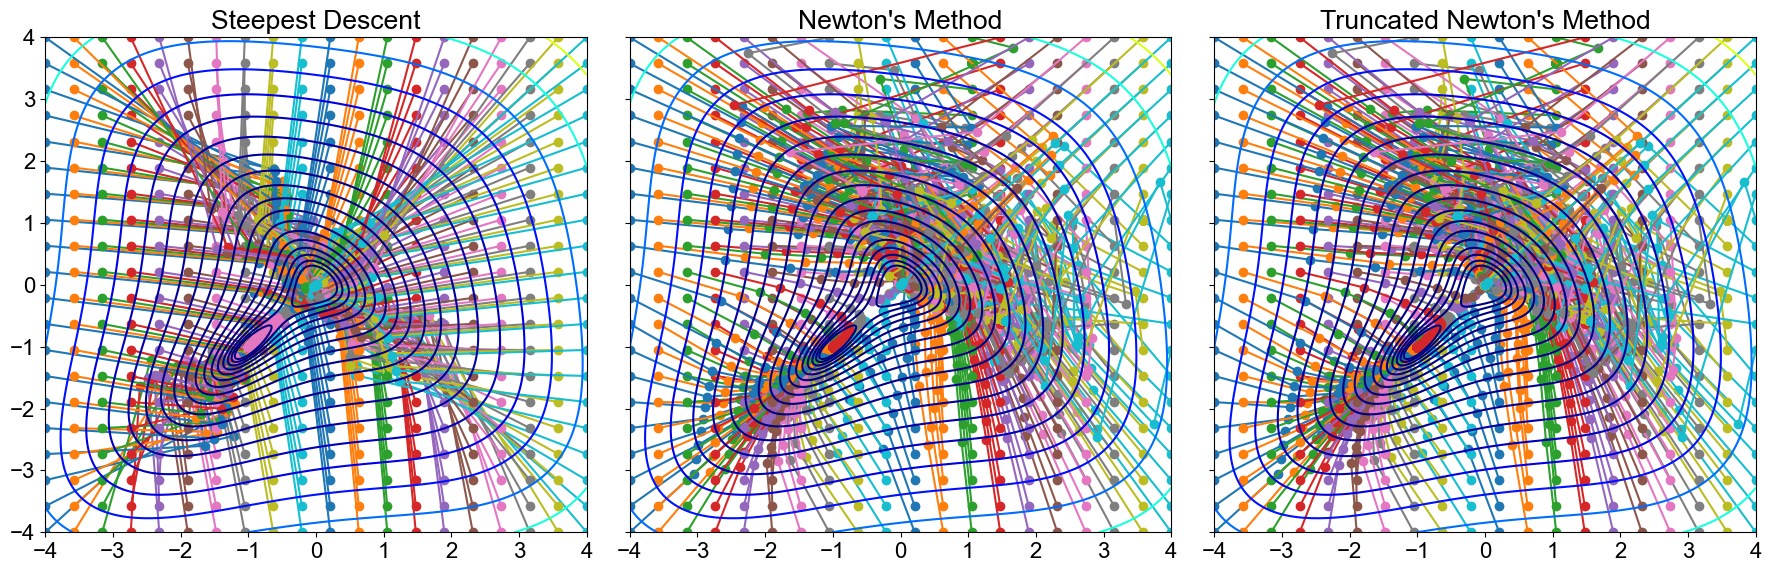

In [18]:
# Setting the grid of initial points
x0_values = np.linspace(-4, 4, 20)
y0_values = np.linspace(-4, 4, 20)
X0, Y0 = np.meshgrid(x0_values, y0_values)
initial_points = np.vstack([X0.ravel(), Y0.ravel()]).T

# Mapping of trajectories and contours
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

for point in initial_points:  
    _, traj_sd = steepest_descent(f, f_prime, point)
    _, traj_nm = newtons_method(f, f_prime, f_double_prime, point)
    _, traj_tnm = truncated_newtons_method(f, f_prime, f_double_prime, point)

    axs[0].plot(*zip(*traj_sd), '-o')
    axs[1].plot(*zip(*traj_nm), '-o')
    axs[2].plot(*zip(*traj_tnm), '-o')

for ax in axs:
    plot_contours_sparse(ax)

axs[0].set_title('Steepest Descent')
axs[1].set_title("Newton's Method")
axs[2].set_title("Truncated Newton's Method")

plt.tight_layout()
plt.show()


- **Steepest descent:** the trajectory of this method shows that the path may be tortuous from different initial points, especially when approaching the minimum point. This method relies on the direction of the gradient and may require several iterations to reach the minimum point, especially in regions where the gradient does not vary much.
- **Newton's method:** the trajectory of Newton's method shows that it is usually possible to move more directly towards the minimum point by starting from a different initial point. This is due to the fact that Newton's method uses Hessian matrix to adjust the direction and step size of the search so that it usually converges faster.
- **Truncated Newton's method:** the trajectory of the truncated Newton's method is similar to that of the Newton's method, but it approximates the Newton's direction using the conjugate gradient method, which is more efficient when dealing with large-scale problems. From the plotted trajectory, it is effective in moving towards the minimum point, but the path may be slightly different compared to the full Newton's method.

For each of the three methods plot three trajectories that are representative of the different behaviour from different starting points. 

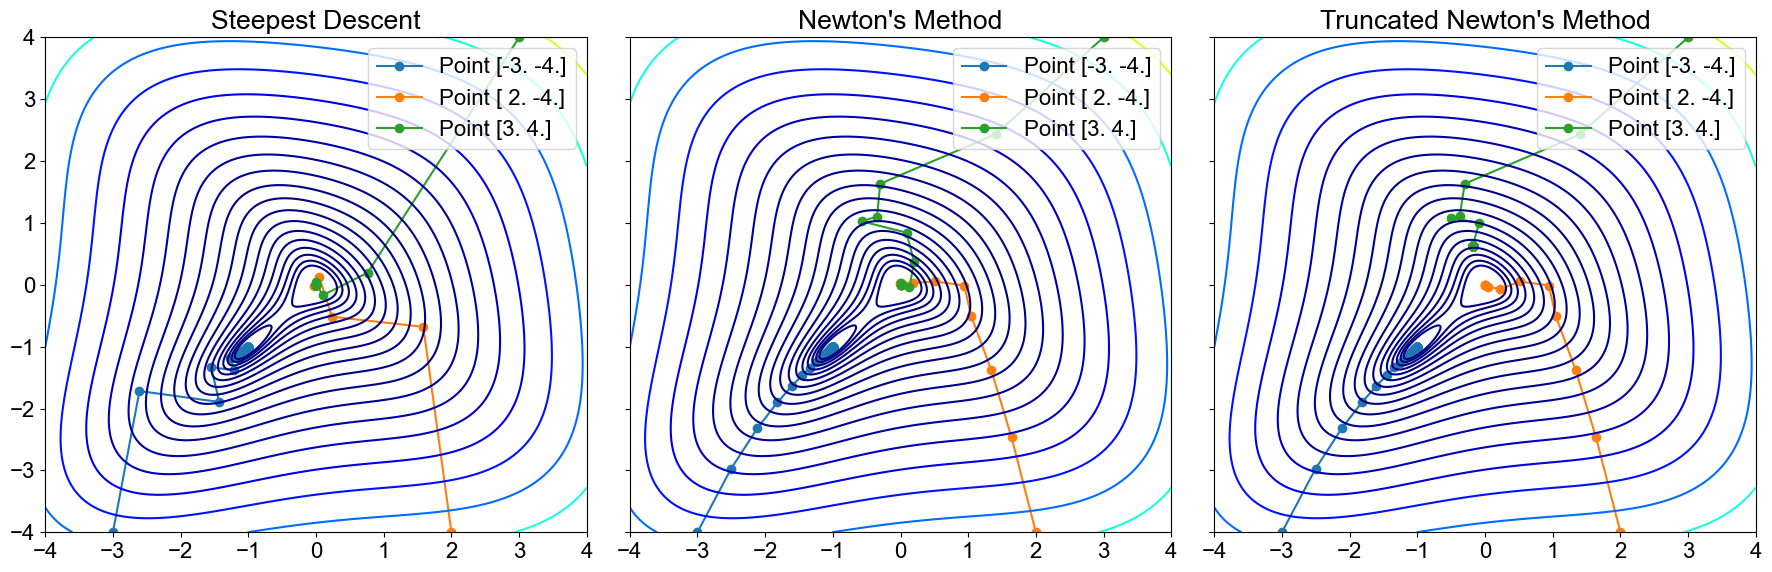

In [19]:
# Setting the grid of initial points
x0_values = np.linspace(-4, 4, 20)
y0_values = np.linspace(-4, 4, 20)
X0, Y0 = np.meshgrid(x0_values, y0_values)

# Define a few special points to look at our image
initial_points = np.array([
    [-3., -4.],
    [2., -4.],
    [3., 4.]
])

# Mapping of trajectories and contours
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

for point in initial_points:  
    _, traj_sd = steepest_descent(f, f_prime, point)
    _, traj_nm = newtons_method(f, f_prime, f_double_prime, point)
    _, traj_tnm = truncated_newtons_method(f, f_prime, f_double_prime, point)

    axs[0].plot(*zip(*traj_sd), '-o', label=f'Point {point}')
    axs[1].plot(*zip(*traj_nm), '-o', label=f'Point {point}')
    axs[2].plot(*zip(*traj_tnm), '-o', label=f'Point {point}')

for ax in axs:
    plot_contours_sparse(ax)

axs[0].set_title('Steepest Descent')
axs[1].set_title("Newton's Method")
axs[2].set_title("Truncated Newton's Method")

for ax in axs:
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


The function values for **Steepest Descent** decrease rapidly, showing an effective reduction in function values during the initial iterations, but the rate of convergence may slow down as the minimum point is approached.

**Newton's and Truncated Newton's** methods show a more gentle trend of decreasing function values over the course of the iterations, but due to the use of second-order information, both methods are usually more accurate in moving toward the point of minimum, especially as the optimal solution is approached.

A comparison of these trajectories and contour plots shows that although all three methods find the minimum point of the function, they converge at different speeds and on different paths. Newton's method and Truncated Newton's method typically converge faster than Steepest Descent, and these observations are consistent with theory, demonstrating the differences in performance of different optimization methods when solving real-world problems.